In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
data = pd.read_csv('telco customer data.csv')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors='coerce')
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data[data['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
data.dropna(inplace=True)

In [13]:
data.tenure.max()

72

In [14]:
labels = [f'{i} - {i+11}' for i in range(1,72,12)]
labels

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']

In [15]:
data['tenure_group'] = pd.cut(data.tenure,range(1,80,12),right=False,labels=labels)

In [16]:
data.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [17]:
data.drop(columns=['customerID'],inplace=True)

In [18]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [19]:
# for ind,col in enumerate(data):
#     plt.figure(ind)
#     sns.countplot(data=data,x=col,hue='Churn')

In [20]:
data.Churn = data.Churn.apply(lambda x : 1 if x=='Yes' else 0)

In [21]:
# converting them in dummies
data_dummy = pd.get_dummies(data)
data_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


<AxesSubplot: xlabel='TotalCharges', ylabel='MonthlyCharges'>

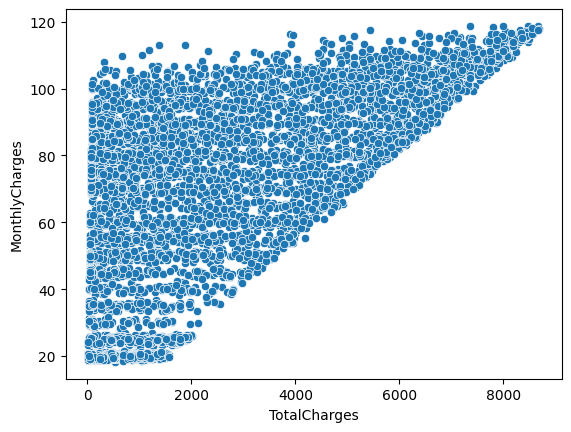

In [22]:
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=data_dummy)

In [23]:
corr_rel=data.corr()

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\133296577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_rel=data.corr()


In [24]:
corr_rel['TotalCharges'].sort_index(ascending=False)

tenure            0.825880
TotalCharges      1.000000
SeniorCitizen     0.102411
MonthlyCharges    0.651065
Churn            -0.199484
Name: TotalCharges, dtype: float64

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\2103942118.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.MonthlyCharges[data_dummy.Churn==0],color='red',shade=True)
C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\2103942118.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.MonthlyCharges[data_dummy.Churn==1],color='blue',shade=True)


Text(0.5, 1.0, 'Monthly charges by churn')

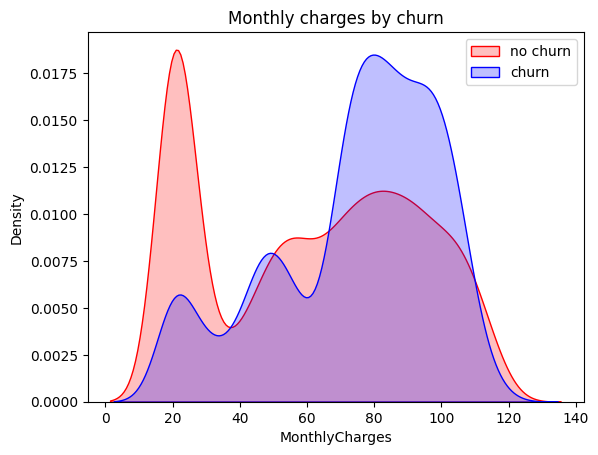

In [25]:
sns.kdeplot(data.MonthlyCharges[data_dummy.Churn==0],color='red',shade=True)
sns.kdeplot(data.MonthlyCharges[data_dummy.Churn==1],color='blue',shade=True)
plt.legend(['no churn','churn'],loc='upper right')
plt.title('Monthly charges by churn')

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\146987002.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_dummy.TotalCharges[data_dummy.Churn==0],color='red',shade=True)
C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\146987002.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_dummy.TotalCharges[data_dummy.Churn==1],color='blue',shade=True)


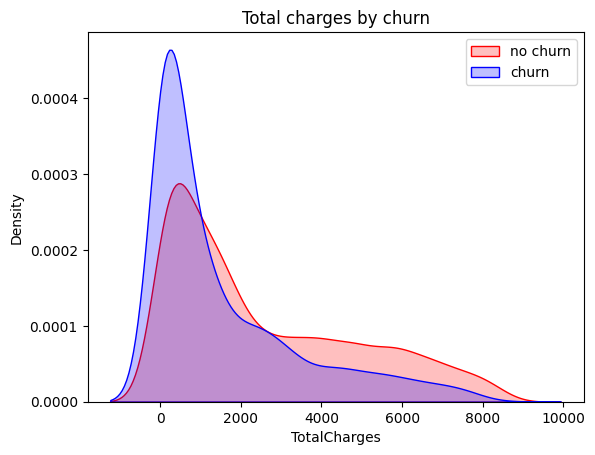

In [26]:
sns.kdeplot(data_dummy.TotalCharges[data_dummy.Churn==0],color='red',shade=True)
sns.kdeplot(data_dummy.TotalCharges[data_dummy.Churn==1],color='blue',shade=True)
plt.title('Total charges by churn')
plt.legend(['no churn','churn'],loc='upper right')

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\1847013178.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.tenure[data.Churn==0],color='red',shade=True)
C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_13388\1847013178.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.tenure[data.Churn==1],color='blue',shade=True)


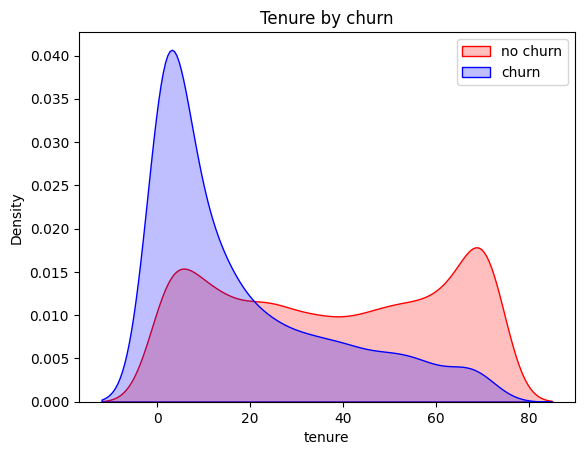

In [27]:
sns.kdeplot(data.tenure[data.Churn==0],color='red',shade=True)
sns.kdeplot(data.tenure[data.Churn==1],color='blue',shade=True)
plt.title('Tenure by churn')
plt.legend(['no churn','churn'],loc='upper right')

<AxesSubplot: >

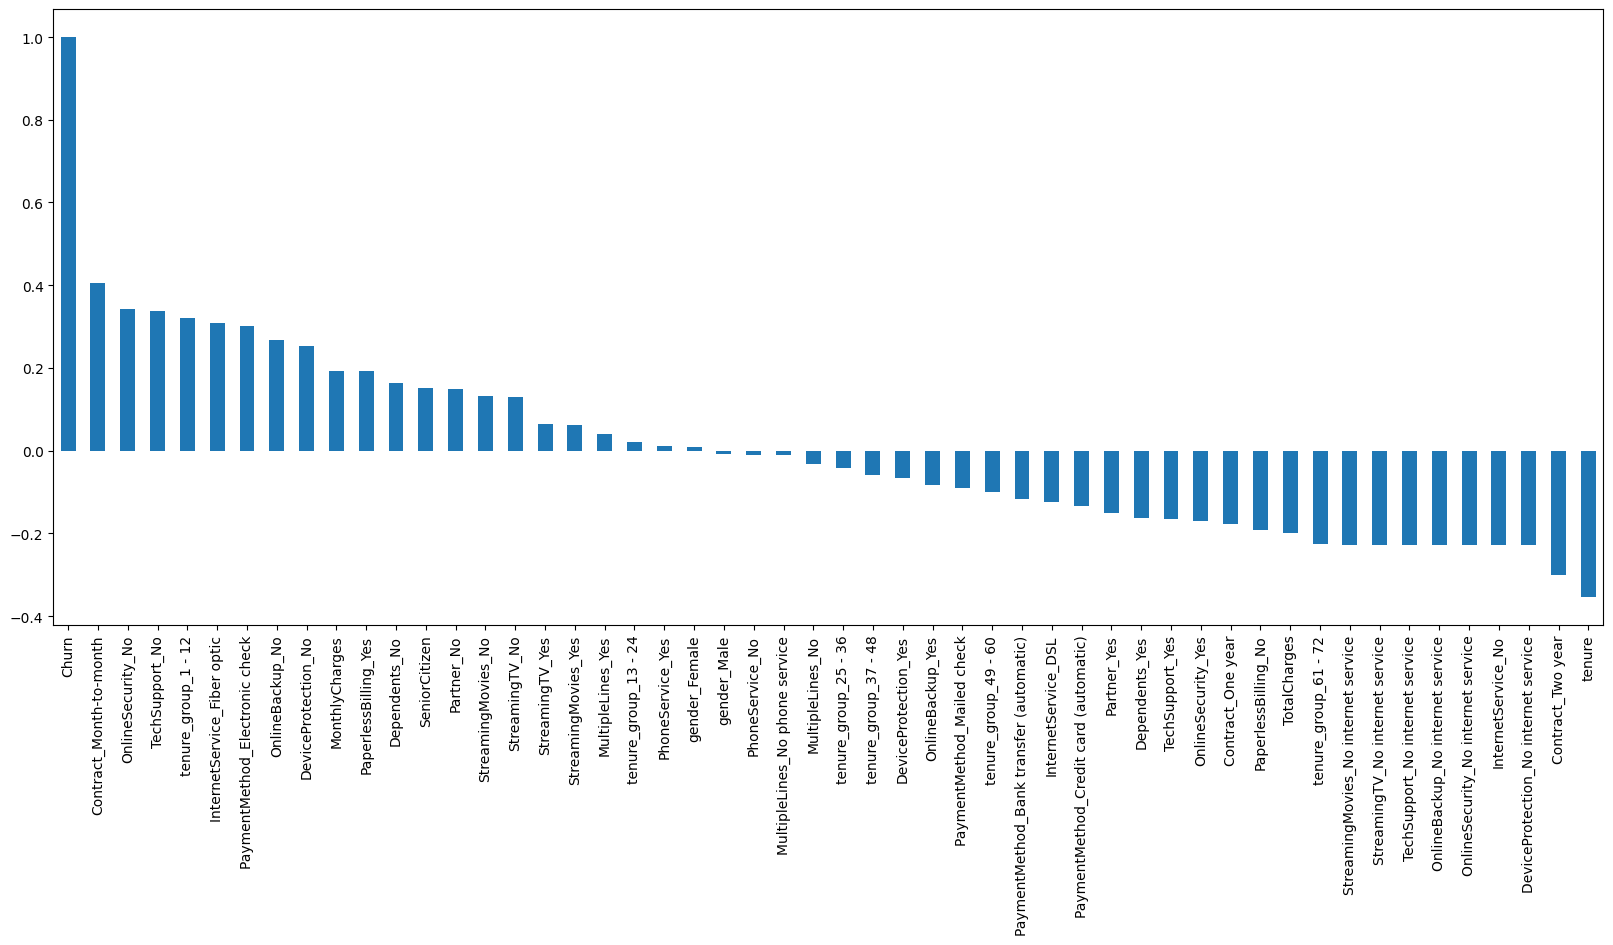

In [28]:
# insight is lower tenure and totalcharges and higher monthlycharges lead to high churn
coreleatin=data_dummy.corr()
plt.figure(figsize=(20,8))
coreleatin['Churn'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot: >

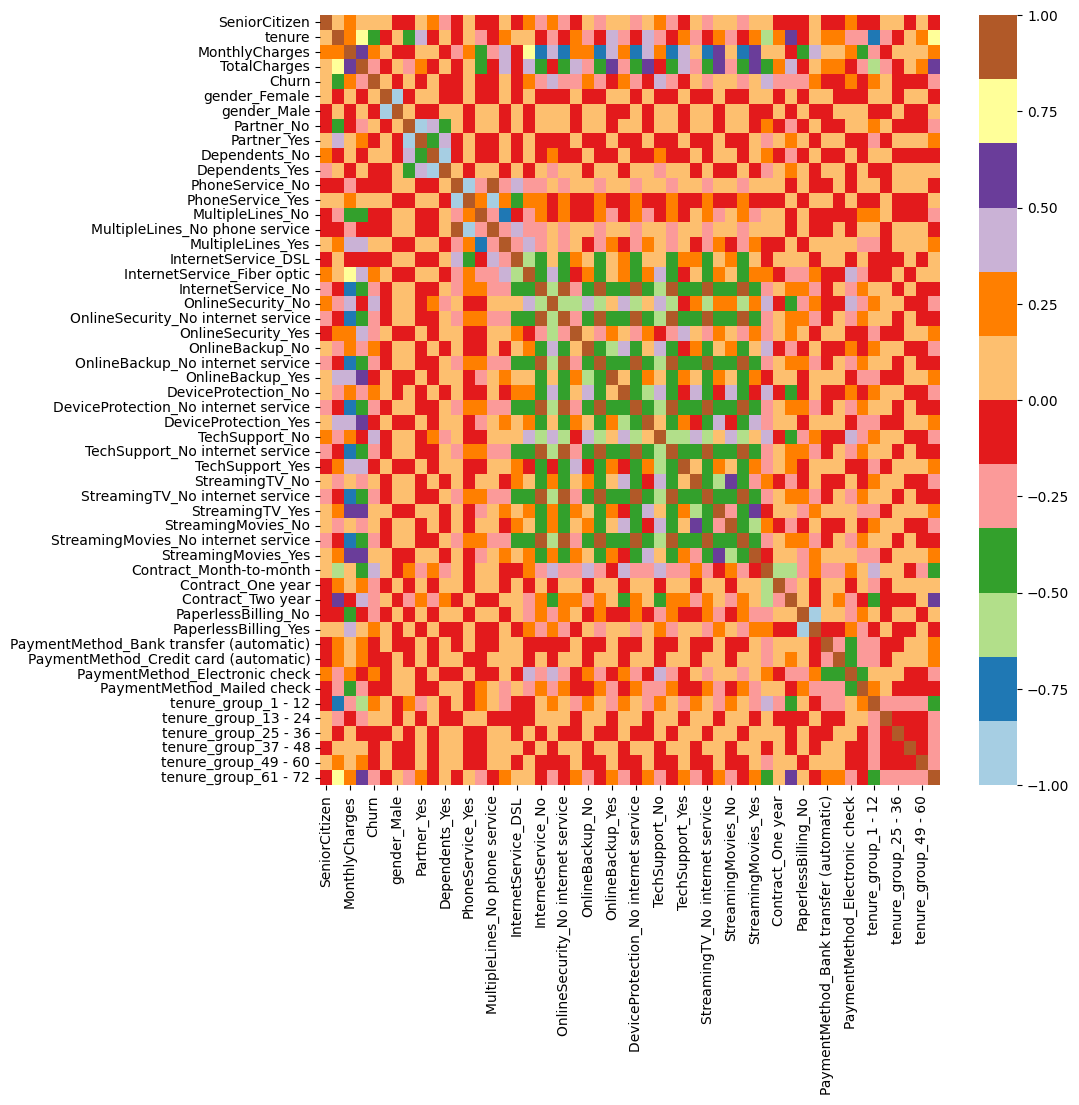

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(data_dummy.corr(),cmap='Paired')

In [30]:
# bivariate analysis
churner = data.loc[data.Churn==1]
non_churner = data.loc[data.Churn==0]

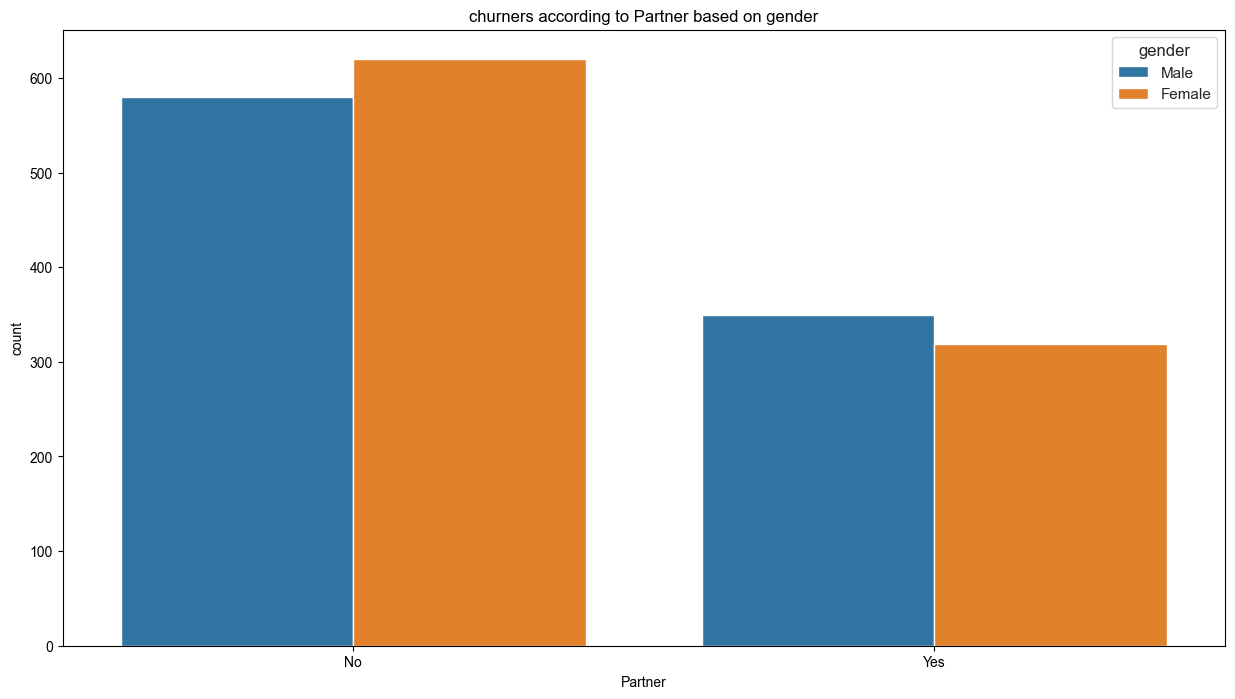

In [31]:
def plot_graph(df,col,title,hue=None):
    fig,ax = plt.subplots(figsize=(15,8))
    sns.set_style('ticks')
    sns.set_context('notebook')
    ax = sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue)
    plt.title(title)
plot_graph(df=churner,col='Partner',title='churners according to Partner based on gender',hue='gender')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 n

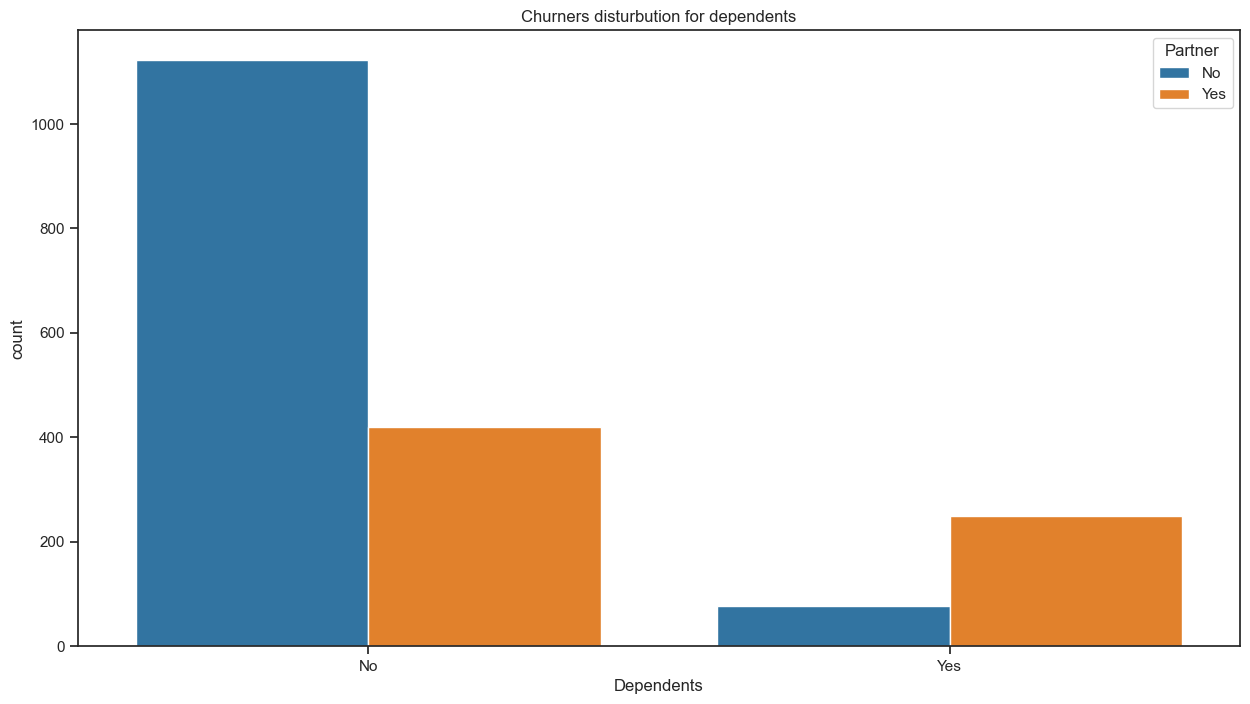

In [33]:
plot_graph(churner,'Dependents','Churners disturbution for dependents','Partner')

In [34]:
# if the are not partners and dependents they are more likely to churn

<Figure size 1500x800 with 0 Axes>

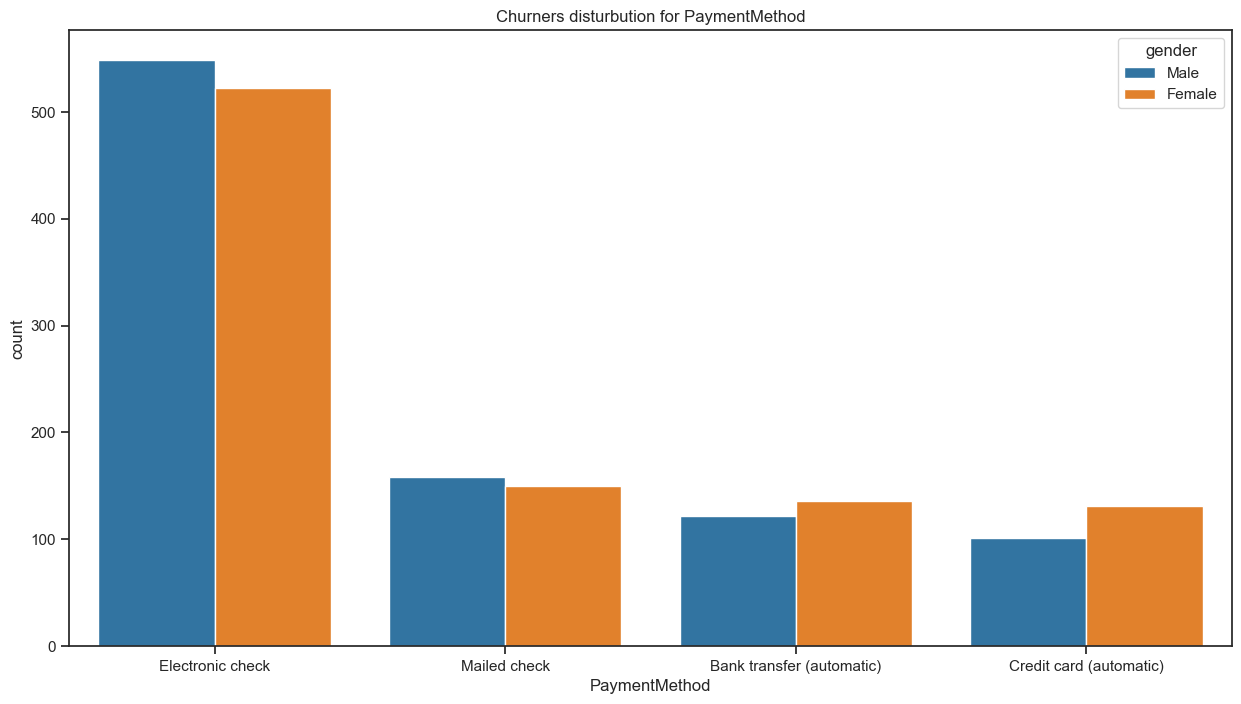

In [35]:
plt.figure(figsize=(15,8))
plot_graph(churner,'PaymentMethod','Churners disturbution for PaymentMethod','gender')

In [36]:
# number of churners female are more likely to churn in automatic system
# number of churners male are more in checks system

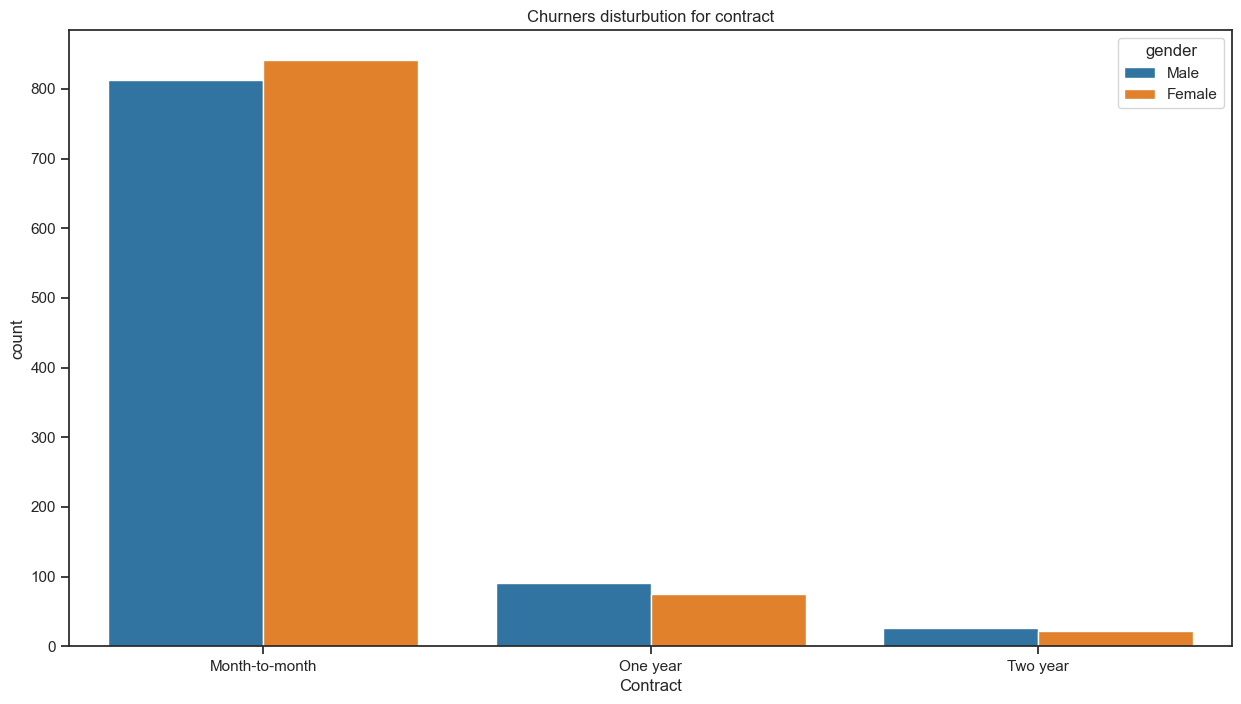

In [37]:
plot_graph(churner,'Contract','Churners disturbution for contract','gender')

In [38]:
# monthly contract are higher churners
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 n

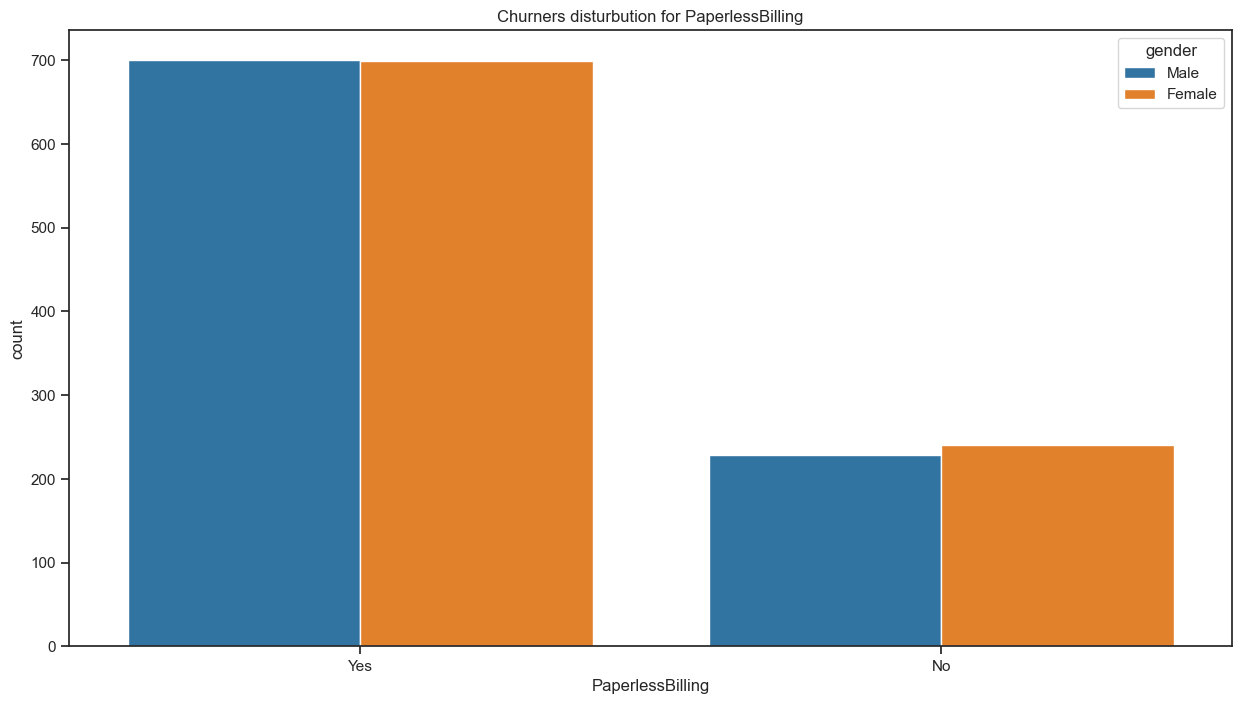

In [39]:
plot_graph(churner,'PaperlessBilling','Churners disturbution for PaperlessBilling','gender')

In [40]:
# PaperlessBilling is also having high churners

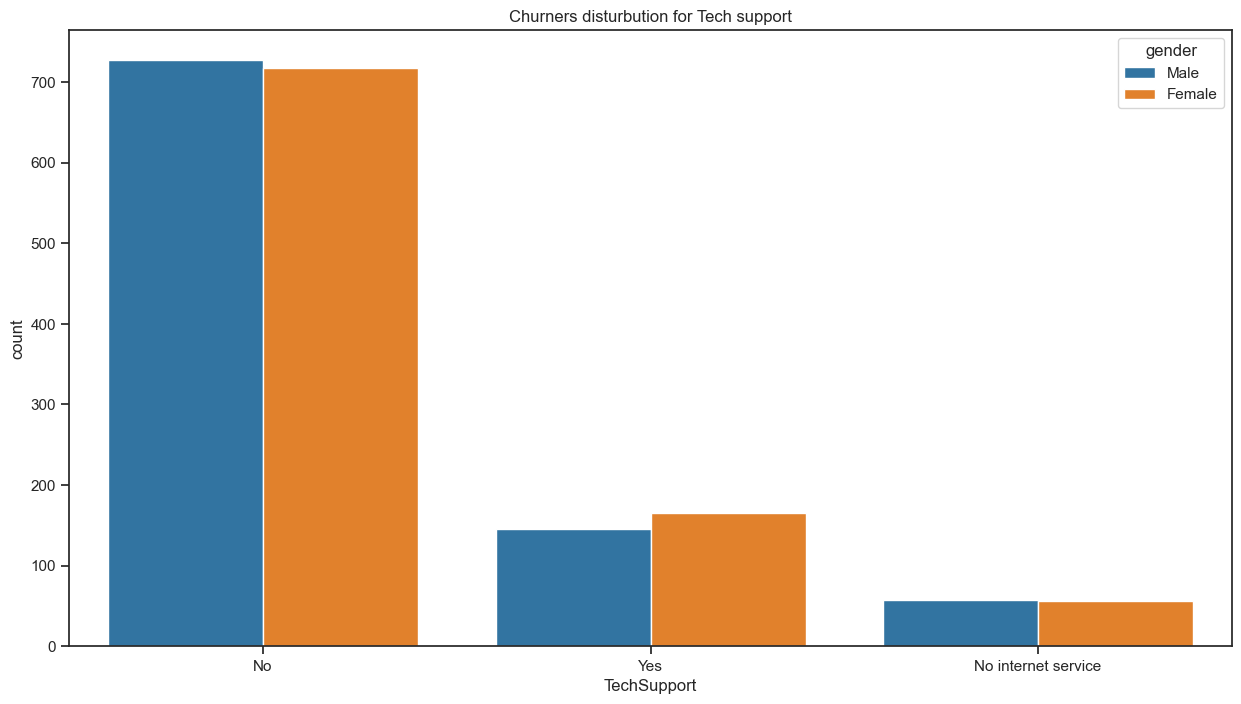

In [41]:
plot_graph(churner,'TechSupport','Churners disturbution for Tech support','gender')

In [42]:
# no tech support catagory  has higest number of churners

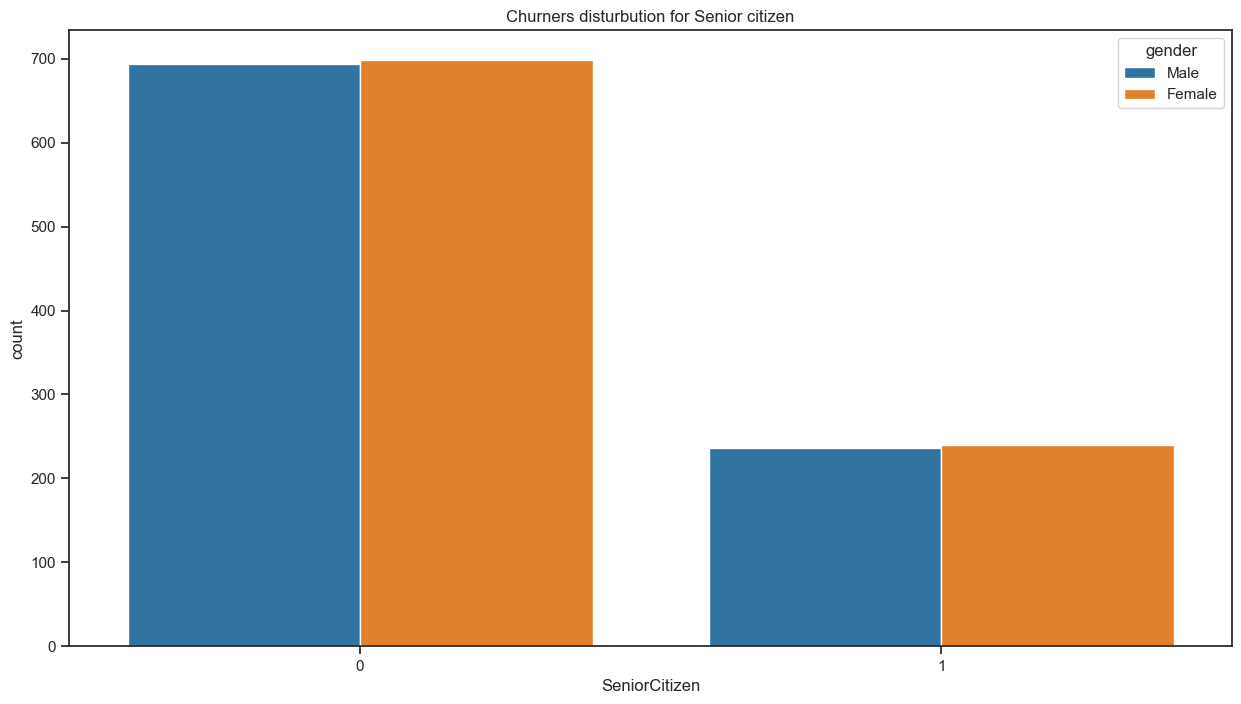

In [43]:
plot_graph(churner,'SeniorCitizen','Churners disturbution for Senior citizen','gender')

In [44]:
# no senior citizen has more number of churners

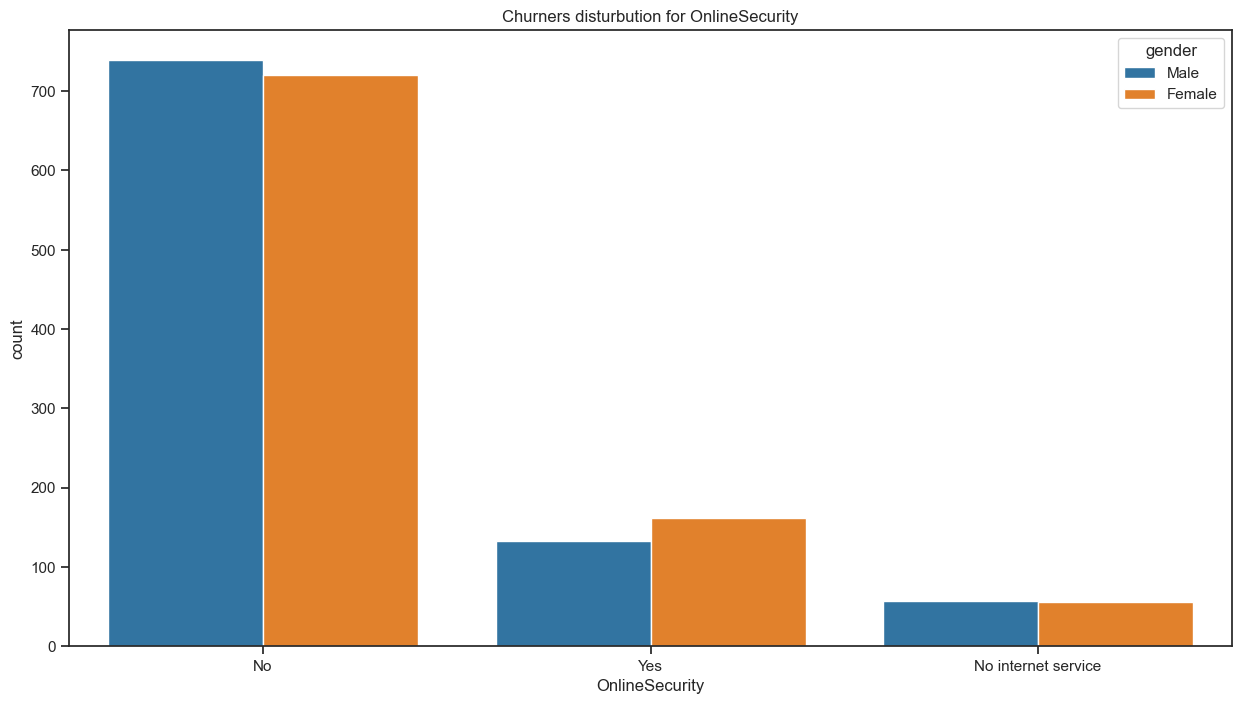

In [45]:
plot_graph(churner,'OnlineSecurity','Churners disturbution for OnlineSecurity','gender')

In [46]:
# no online security has more number of churners

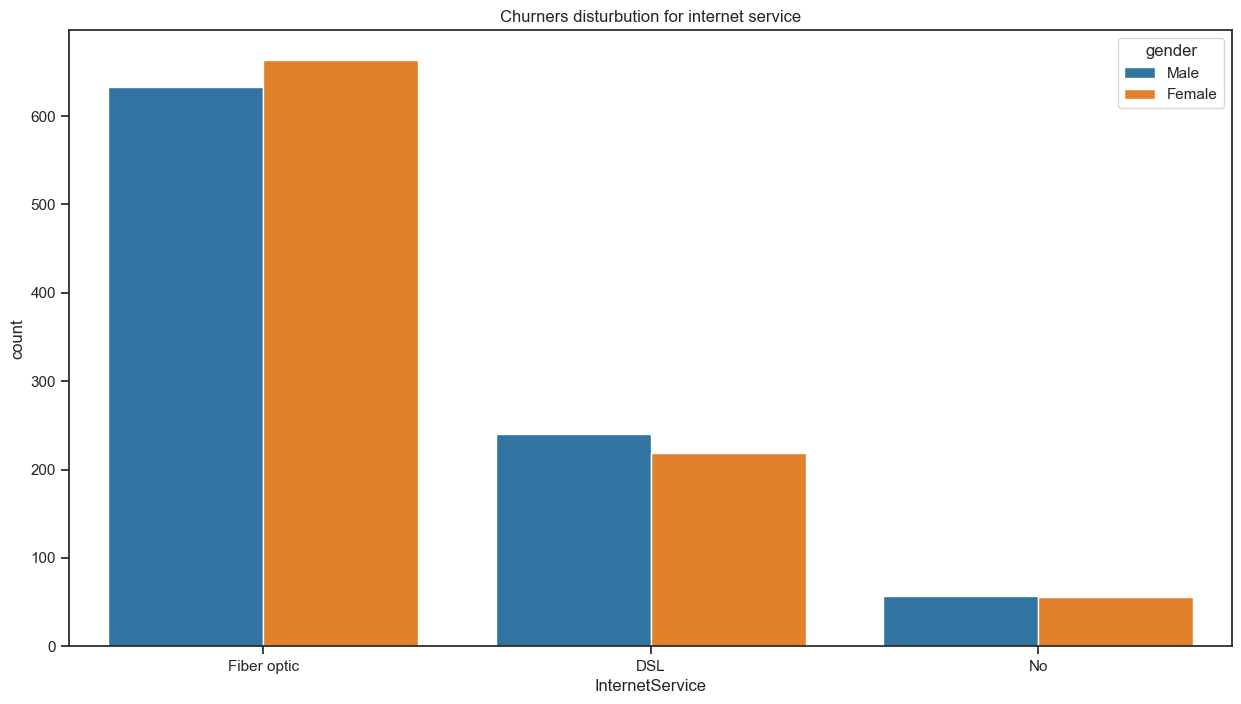

In [47]:
plot_graph(churner,'InternetService','Churners disturbution for internet service','gender')

In [48]:
# fiber optic internet services has higher number or churners

In [49]:
# conclution :
# higest number of churner :
# internet services - fiberoptic
# online security - no
# senior citizien -no
# contract - monthly to monthly
# parters and dependents - no
# female -  automatic system
# male checks system
# Paper billing - yes
# tech support - no

In [50]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [51]:
data_dummy = pd.get_dummies(data.drop(columns='tenure'))

In [52]:
# data_dummy.to_csv('model_data.csv')

In [53]:
model_data = pd.read_csv('model_data.csv')

In [54]:
model_data.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [55]:
model_data.drop(columns='Unnamed: 0',inplace = True)

In [56]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 51 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   int64  
 5   gender_Male                              7032 non-null   int64  
 6   Partner_No                               7032 non-null   int64  
 7   Partner_Yes                              7032 non-null   int64  
 8   Dependents_No                            7032 non-null   int64  
 9   Dependents_Yes                           7032 non-null   int64  
 10  PhoneService_No                          7032 no

In [57]:
source = model_data.drop(columns='Churn')
target = model_data['Churn']

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=45)

In [59]:
for train_index,test_index in split.split(source,target):
    x_train,y_train = source.iloc[train_index],target.iloc[train_index]
    x_test,y_test = source.iloc[test_index],target.iloc[test_index]

In [60]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [61]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report,accuracy_score
mse = mean_squared_error(y_test,y_pred)
mse

0.26439232409381663

In [64]:
rmse = np.sqrt(mse)
rmse

0.5141909412794207

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.49      0.50       374

    accuracy                           0.74      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.73      0.74      0.73      1407



In [66]:
# from imblearn.combine import SMOTEENN
accuracy_score(y_test,y_pred)

0.7356076759061834

In [67]:
model.score(x_test,y_test)

0.7356076759061834

In [68]:
confusion_matrix(y_test,y_pred)

array([[850, 183],
       [189, 185]], dtype=int64)

In [69]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(model,x_train,y_train)

In [70]:
np.mean(acc)

0.7288888888888889

In [71]:
from imblearn.combine import SMOTEENN

In [72]:
sm = SMOTEENN()
x_sample,y_sample = sm.fit_resample(source,target)

In [73]:
for train_index,test_index in split.split(x_sample,y_sample):
    x_train,y_train = x_sample.iloc[train_index],y_sample.iloc[train_index]
    x_test,y_test = x_sample.iloc[test_index],y_sample.iloc[test_index]

In [74]:
from sklearn.ensemble import RandomForestClassifier
r_model = RandomForestClassifier()

In [75]:
r_model.fit(x_train,y_train)

RandomForestClassifier()

In [76]:
y_pred = r_model.predict(x_test)

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       529
           1       0.95      0.96      0.95       659

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188



In [79]:
accuracy_score(y_test,y_pred)

0.9478114478114478

In [80]:
from joblib import dump,load

In [82]:
dump(r_model,'churn_predictor.joblib')

['churn_predictor.joblib']

In [83]:
models = load('churn_predictor.joblib')

In [84]:
models.score(x_test,y_test)

0.9478114478114478